In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

# Selecting the best model
#### - How to select the best model using model selection and selection of hyperparameters?
#### - What to do when our estimator is underperforming?
- use a more complicated / more flexible model
- use a less complicated / less flexible model
- gather more training samples
- gather more data to add features to each sample

### determine what steps will improve our model is what seperate the successful machine learning practitioners from the unsuccessful.
- best is the trade-off between bias and variance
- the purpose of the best model is to have high accuracy for the test data as well as the training data.

# Validation curves in Scikit-learn
- calculating validation curve using cross-validation
- we'll use polynomial regression here
- combine linear regression with polinomial preprocessor
- use pipeline to string these operations together

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [4]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

In [5]:
# create data to fit the model
def make_data(N, err=1.0, rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1 / (X.ravel() + 0.1) # X.ravel() returns a flattened array
    
    if err > 0:
        y+= err * rng.randn(N)
        return X, y
    
X, y = make_data(40)

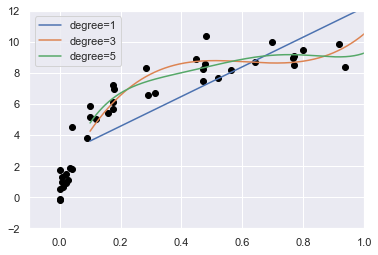

In [6]:
# visualize the data with polynomial fits of several degree
sns.set()

X_test = np.linspace(0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()

for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
    
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best')

# Learning Curve
- optimal model depends upon the size of the training data
- generating the new dataset with a factor of five more points

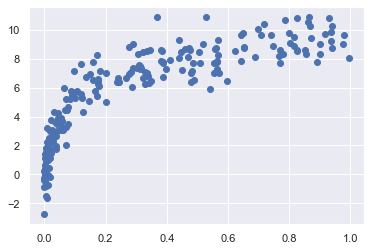

In [7]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2)

### Learning Curves in Scikit-Learn

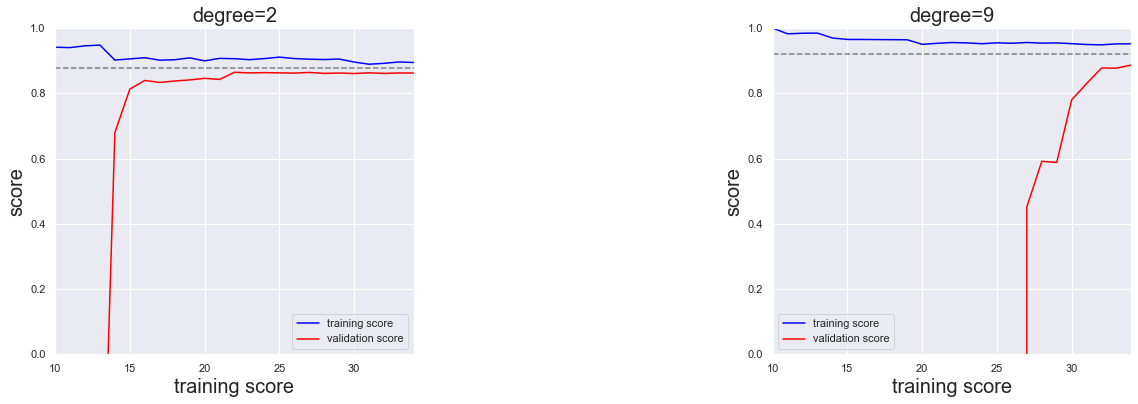

In [8]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize = (46, 6))
fig.subplots_adjust(left=0.625, right=0.95, wspace=1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                        X, y, cv=7,
                                        train_sizes=np.linspace(0.3, 1, 25))
    
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                color='grey', linestyle = 'dashed')
    
    ax[i].set_ylim(0,1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training score', size=20)
    ax[i].set_ylabel('score', size=20)
    ax[i].set_title('degree={0}'.format(degree), size=20)
    ax[i].legend(loc='best')

# Feature engineering
Feature engineering takes what ever information you have about your problem and turns it into
numbers to build the features matrix.

we'll cover...
- Features for representing `categorical data`
- Features for representing `text`
- `Derived Features` for increasing model complexity
- Imputation of missing data
The above process is called Vectorization means converting arbitrary data into vectors

### categorical features
- categorical data is non-numerical data. Ex. house information such as price, room, neighborhood

In [10]:
data = [
    {'price': 85000, 'room': 4, 'neighborhood': 'Queen Anne'},
    {'price': 70000, 'room': 3, 'neighborhood': 'Fremont'},
    {'price': 65000, 'room': 3, 'neighborhood': 'Wallingford'},
    {'price': 60000, 'room': 2, 'neighborhood': 'Fremont'},
    
]
data

[{'price': 85000, 'room': 4, 'neighborhood': 'Queen Anne'},
 {'price': 70000, 'room': 3, 'neighborhood': 'Fremont'},
 {'price': 65000, 'room': 3, 'neighborhood': 'Wallingford'},
 {'price': 60000, 'room': 2, 'neighborhood': 'Fremont'}]

In [11]:
# The possible solution is one-hot-coding which creates extra column indicating the presence or absence of a cetagory with a value of 1 or 0
# Using DictVectorizer when the data is in the form of Dictionary

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

# sparse: Whether transform should produce scipy.sparse matrices (很大裡面一堆零的矩陣).

array([[    0,     1,     0, 85000,     4],
       [    1,     0,     0, 70000,     3],
       [    0,     0,     1, 65000,     3],
       [    1,     0,     0, 60000,     2]])

In [12]:
vec.get_feature_names()

C:\Users\mabo2\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'room']

In [13]:
vec.get_feature_names_out()

array(['neighborhood=Fremont', 'neighborhood=Queen Anne',
       'neighborhood=Wallingford', 'price', 'room'], dtype=object)

In [14]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

### text features
- Converting text into numerical values
- One of the simplest method is by word_counts, which counts the occurance of each word and put them in a table
- Using CountVectorizer

In [15]:
sample = ['problem of evil',
         'evil queen',
         'horizon problem']

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [17]:
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


### derived features
- features are mathematically derived from some input features
- Like converting a linear regression into polynomial regression from input data

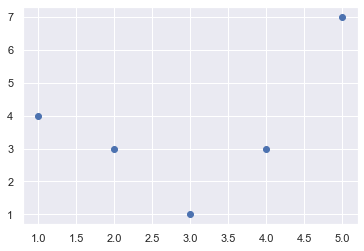

In [18]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 3, 1, 3, 7])
plt.scatter(x, y)

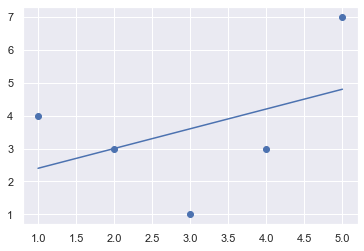

In [19]:
from sklearn.linear_model import LinearRegression

X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit)

# this is poor fit of a straight line
# we need a more flexible model so that we can add extra polynomial features

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


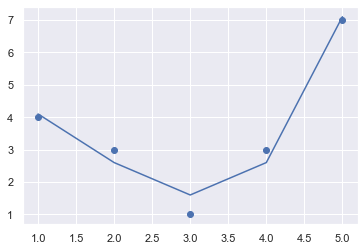

In [21]:
# let's compute the linear regression again on this new data
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit)

### imputation of missing data
- How to handle missing data using machine learning approach
- Using imputation of missing values, range from mean, median or most frequent values

In [22]:
from numpy import nan

X = np.array([[nan, 0, 3],
            [3, 7, 9],
            [3, 5 ,2],
            [4, nan, 6],
            [8, 8, 1]]
            )
y = np.array([14, 16, -1, 8, -5 ])

In [23]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=nan, strategy='mean') # columnwise mean
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [24]:
imp = SimpleImputer(missing_values=nan, strategy='most_frequent') # columnwise
X2 = imp.fit_transform(X)
X2

array([[3., 0., 3.],
       [3., 7., 9.],
       [3., 5., 2.],
       [4., 0., 6.],
       [8., 8., 1.]])

In [25]:
imp = SimpleImputer(missing_values=nan, strategy='constant', fill_value=6) # directly specify a value
X2 = imp.fit_transform(X)
X2

array([[6., 0., 3.],
       [3., 7., 9.],
       [3., 5., 2.],
       [4., 6., 6.],
       [8., 8., 1.]])

In [26]:
imp = SimpleImputer(missing_values=nan, strategy='constant') # use aero to fill nen
X2 = imp.fit_transform(X)
X2

array([[0., 0., 3.],
       [3., 7., 9.],
       [3., 5., 2.],
       [4., 0., 6.],
       [8., 8., 1.]])

In [27]:
# The data can be fed into LinearRegression estimator
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([10.94364937, 15.28085868,  3.41758242,  9.48964988, -7.13174035])